# Assigment 8

### Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sys

### 1. Load data from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [2]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, sep='\s+')

df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 2. Using the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
df.columns = columns

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
print( df.shape)
df.dtypes

(398, 9)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# convert car name to str
df['car name'] = df['car name'].astype(str)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

## horsepower 
Fill ? with values and convert to float

In [6]:
# Replacing horsepower ? with None
# also save this rows in another DataFrame to check
df_horsepower = df[df['horsepower'] == '?']
idxs_horsepower = df['horsepower'] == '?'
df.loc[idxs_horsepower, ['horsepower']] = np.NaN
# Convert horsepower to float
df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
# rows with horsepower equals to ?
df_horsepower

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [8]:
# I will sort by some columns and apply interpolate function to fill NA values

df = df.sort_values(["car name", "cylinders","acceleration", "weight", "model year"])
print(df.dtypes)
df = df.interpolate()
df.head()

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
96,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
66,17.0,8,304.0,150.0,3672.0,11.5,72,1,amc ambassador sst
315,24.3,4,151.0,90.0,3003.0,20.1,80,1,amc concord
257,19.4,6,232.0,90.0,3210.0,17.2,78,1,amc concord


In [9]:
# check if the values were filled
list_names = df_horsepower["car name"].values.tolist()
df[df["car name"].isin(list_names)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
374,23.0,4,151.0,105.0,3035.0,20.5,82,1,amc concord dl
17,21.0,6,200.0,85.0,2587.0,16.0,70,1,ford maverick
100,18.0,6,250.0,88.0,3021.0,16.5,73,1,ford maverick
126,21.0,6,200.0,84.5,2875.0,17.0,74,1,ford maverick
193,24.0,6,200.0,81.0,3012.0,17.6,76,1,ford maverick
155,15.0,6,250.0,72.0,3158.0,19.5,75,1,ford maverick
336,23.6,4,140.0,87.0,2905.0,14.3,80,1,ford mustang cobra
206,26.5,4,140.0,72.0,2565.0,13.6,76,1,ford pinto
130,26.0,4,122.0,80.0,2451.0,16.5,74,1,ford pinto
168,23.0,4,140.0,83.0,2639.0,17.0,75,1,ford pinto


In [10]:
df.shape

(398, 9)

## The origin column values are 1, 2, and 3. 
Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [11]:

equiv = {1:'USA', 2:'Asia', 3:'Europe'}

df["origin"] = df["origin"].map(equiv)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
96,13.0,8,360.0,175.0,3821.0,11.0,73,USA,amc ambassador brougham
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,amc ambassador dpl
66,17.0,8,304.0,150.0,3672.0,11.5,72,USA,amc ambassador sst
315,24.3,4,151.0,90.0,3003.0,20.1,80,USA,amc concord
257,19.4,6,232.0,90.0,3210.0,17.2,78,USA,amc concord
...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
197,29.0,4,90.0,70.0,1937.0,14.2,76,Asia,vw rabbit
309,41.5,4,98.0,76.0,2144.0,14.7,80,Asia,vw rabbit
325,44.3,4,90.0,48.0,2085.0,21.7,80,Asia,vw rabbit c (diesel)


# 6. Create a bar chart that shows the distribution for cylinders.

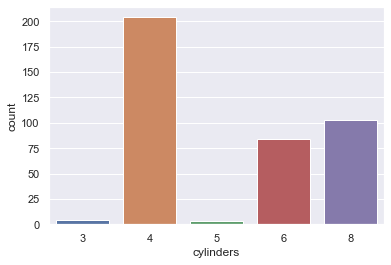

In [12]:
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x="cylinders", data=df)

In [13]:
# Check result
df.groupby('cylinders').count()

,mpg,displacement,horsepower,weight,acceleration,model year,origin,car name
cylinders,,,,,,,,
3,4,4,4,4,4,4,4,4
4,204,204,204,204,204,204,204,204
5,3,3,3,3,3,3,3,3
6,84,84,84,84,84,84,84,84
8,103,103,103,103,103,103,103,103


# 7. Create a scatterplot that shows the relationship between horsepower and weight.

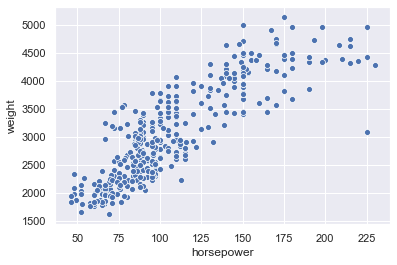

In [14]:
sns.scatterplot(data=df, x="horsepower", y="weight")

### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

-------
Question: How does weight influence fuel consumption?

To answer this question I will use a scatter plot with mpg and weight

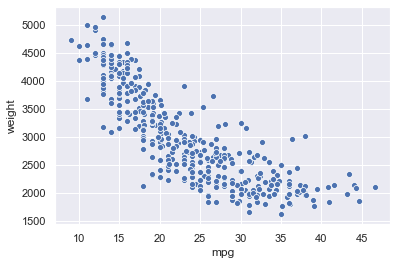

In [15]:
sns.scatterplot(data=df, x="mpg", y="weight")

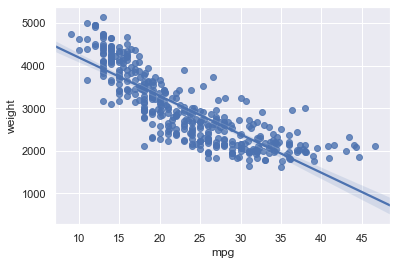

In [16]:
sns.regplot(data=df, x="mpg", y="weight")

## Answer: 
Using regplot I could see that a linear regression fits well, so I can tell if the weight goes down, the mpg goes down and vice versa.